In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import StandardScaler

In [125]:
sales = pd.read_csv(r"D:\FIFA STATS\Study\online_retail_dataset.csv")

In [126]:
uk_sales = sales[["week","United Kingdom"]]

In [127]:
uk_sales.loc[:,"week"] = uk_sales["week"].astype("datetime64[D]")

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\1038286993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales.loc[:,"week"] = uk_sales["week"].astype("datetime64[D]")
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\1038286993.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  uk_sales.loc[:,"week"] = uk_sales["week"].astype("datetime64[D]")


In [128]:
uk_sales.columns = ["Date","Sales"]
uk_sales.set_index("Date", inplace=True)

In [129]:
uk_sales.head()

,Sales
Date,
2009-12-06,213000.35
2009-12-13,195810.04
2009-12-20,182396.74
2009-12-27,22007.77
2010-01-03,0.00


In [130]:
#Checking for Missing Sales/Timestamp
uk_sales["Sales"].isna().sum()

0

<Axes: xlabel='Date'>

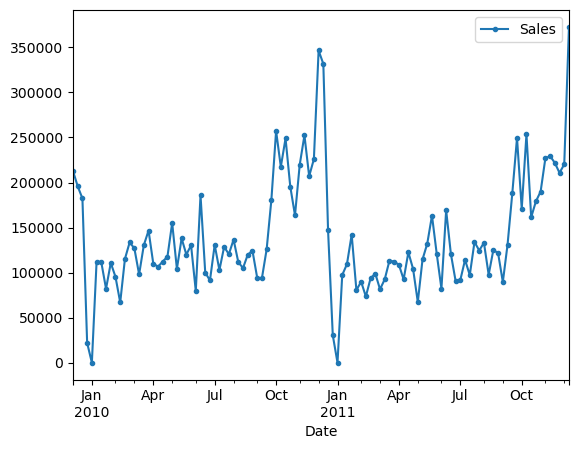

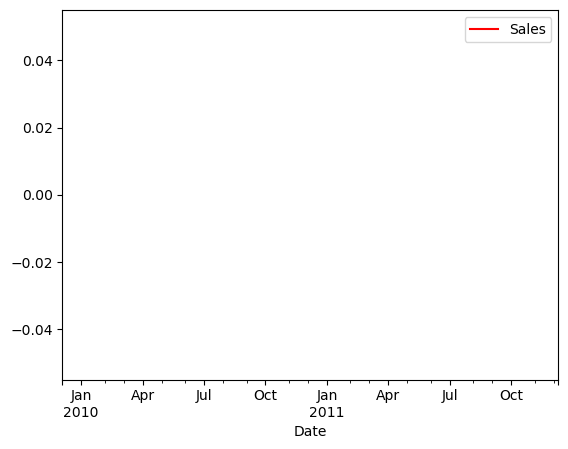

In [131]:
df = uk_sales.asfreq("1W")
df_imputed = df.fillna(method = "ffill")
df.plot(marker=".")
df_imputed[df.isnull()].plot(linestyle="-",color="r")

In [132]:
#Better way is to resample at the same level and check the missing value
uk_sales.resample("W").mean().isna().sum()

Sales    0
dtype: int64

In [133]:
#Plotting the time series Plot to check the seasonality

<Axes: xlabel='Date'>

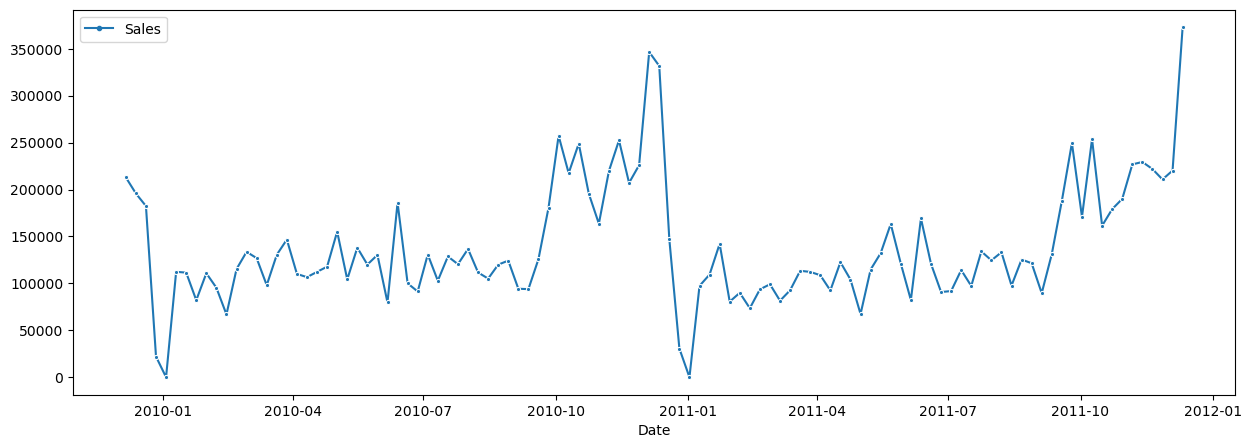

In [134]:
plt.figure(figsize=(15,5))
sns.lineplot(uk_sales,markers=".")

In [135]:
uk_sales["Week"] = uk_sales.index.week
uk_sales["Month"] = uk_sales.index.month

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3716248712.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  uk_sales["Week"] = uk_sales.index.week
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3716248712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["Week"] = uk_sales.index.week
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3716248712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<Axes: xlabel='Week', ylabel='Sales'>

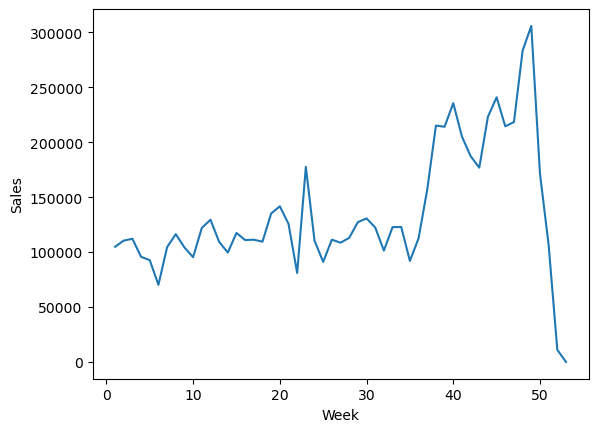

In [136]:
sns.lineplot(uk_sales.groupby(["Week"])["Sales"].agg("mean").reset_index(),x="Week",y="Sales",errorbar=("ci",0))

In [137]:
#Calculating Week of the Month
uk_sales["WOM"] = uk_sales.index.day // 7 + 1

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3248722979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["WOM"] = uk_sales.index.day // 7 + 1


<Axes: xlabel='WOM', ylabel='Sales'>

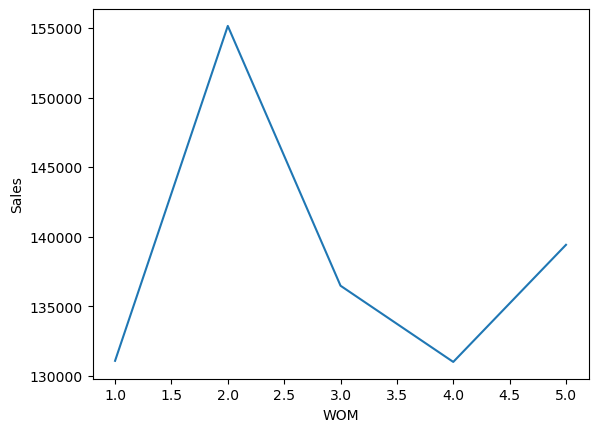

In [138]:
sns.lineplot(uk_sales.groupby("WOM")["Sales"].agg("mean").reset_index(), x= "WOM", y="Sales")

d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


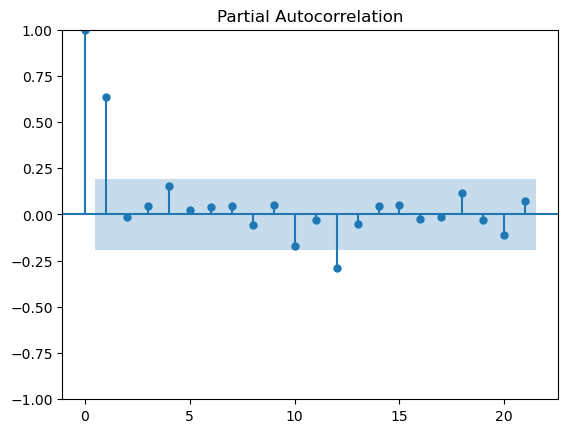

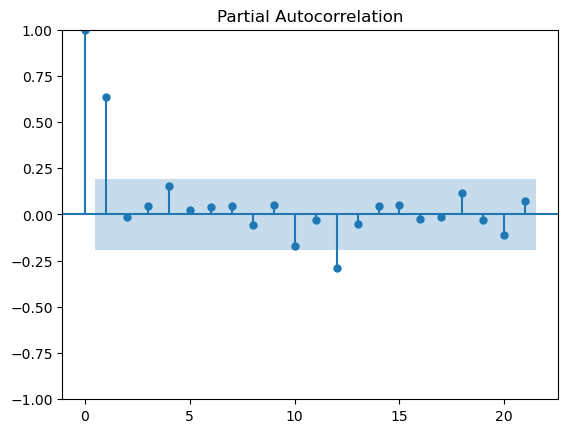

In [139]:
plot_pacf(uk_sales["Sales"])

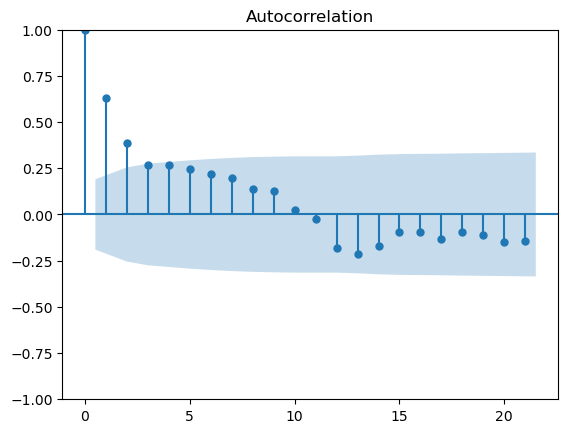

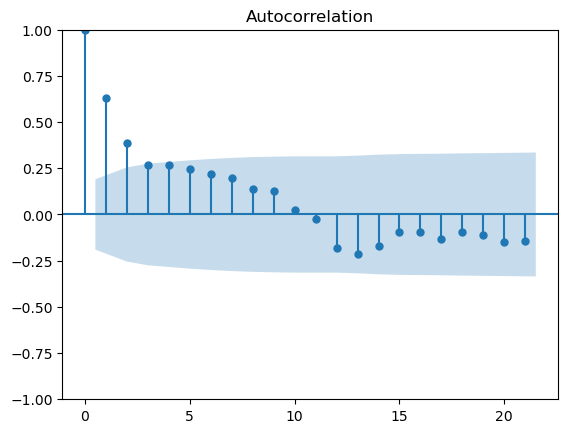

In [140]:
plot_acf(uk_sales["Sales"])

In [141]:
#Creating features
#As per the above pacf graph, we will taking only Lag 1 as the feature - only one significant lag that we have. 
#and based on acf, we would be considering 2,3 and 4 as the rolling mean feature.
#Lag feature
uk_sales["Lag_1"] = uk_sales["Sales"].shift(1)
#Rolling features
for i in [2,3,4]:
    uk_sales["RollingMean_"+str(i)] = uk_sales["Sales"].rolling(i).mean()
    uk_sales["RollingMean_"+str(i)] = uk_sales["RollingMean_"+str(i)].shift(1)


C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\2193122355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["Lag_1"] = uk_sales["Sales"].shift(1)
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\2193122355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["RollingMean_"+str(i)] = uk_sales["Sales"].rolling(i).mean()
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\2193122355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [142]:
uk_sales.head()

,Sales,Week,Month,WOM,Lag_1,RollingMean_2,RollingMean_3,RollingMean_4
Date,,,,,,,,
2009-12-06,213000.35,49,12,1,NaN,NaN,NaN,NaN
2009-12-13,195810.04,50,12,2,213000.35,NaN,NaN,NaN
2009-12-20,182396.74,51,12,3,195810.04,204405.195,NaN,NaN
2009-12-27,22007.77,52,12,4,182396.74,189103.390,197069.043333,NaN
2010-01-03,0.00,53,1,1,22007.77,102202.255,133404.850000,153303.725


In [143]:
#Converting the Week and Month as cyclical feature
#Using Sin and Cos technique.
uk_sales["Week_Sin"] = np.sin(2 * np.pi * uk_sales["Week"]/uk_sales["Week"].max())
uk_sales["Week_Cos"] = np.cos(2 * np.pi * uk_sales["Week"]/uk_sales["Week"].max())

uk_sales["Month_Sin"] = np.sin(2 * np.pi * uk_sales["Month"]/uk_sales["Month"].max())
uk_sales["Month_Cos"] = np.cos(2 * np.pi * uk_sales["Month"]/uk_sales["Month"].max())

uk_sales["WOM_Sin"] = np.sin(2 * np.pi * uk_sales["WOM"]/uk_sales["WOM"].max())
uk_sales["WOM_Cos"] = np.cos(2 * np.pi * uk_sales["WOM"]/uk_sales["WOM"].max())

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3558772813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["Week_Sin"] = np.sin(2 * np.pi * uk_sales["Week"]/uk_sales["Week"].max())
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3558772813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales["Week_Cos"] = np.cos(2 * np.pi * uk_sales["Week"]/uk_sales["Week"].max())
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\3558772813.py:6: SettingWithCopyWarning: 
A value is

In [144]:
uk_sales.dropna(inplace=True)

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\995209111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_sales.dropna(inplace=True)


In [174]:
#Splitting the data 
train_sales = uk_sales.loc[:"2011-09-25",]
test_sales = uk_sales.loc["2011-10-02":,]

In [281]:
mean_squared_error(test_sales["Sales"], test_sales["Lag_1"],squared=False)

65327.34284108387

In [175]:
X_train = train_sales.drop(["Sales"],axis=1)
X_test = test_sales.drop(["Sales"],axis=1)

y_train = train_sales["Sales"]
y_test = test_sales["Sales"]

In [176]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train,y_train)
X_test_sc = sc.transform(X_test)

In [177]:
lr_fit = LinearRegression()
lr_fit.fit(X_train_sc,y_train)
y_pred = lr_fit.predict(X_test_sc)

In [178]:
mean_squared_error(y_test, y_pred, squared=False)

53890.93577314782

In [179]:
lr_fit.coef_

array([-14416.05958707,  58563.98863671,   4279.97100529,  42098.59543157,
       -29288.81391157, -11851.62357404,   1646.61932082, -45380.39332651,
       -14628.44365018,  63954.55204045,  13638.53502397,   5662.05533501,
         1020.99204532])

<Axes: >

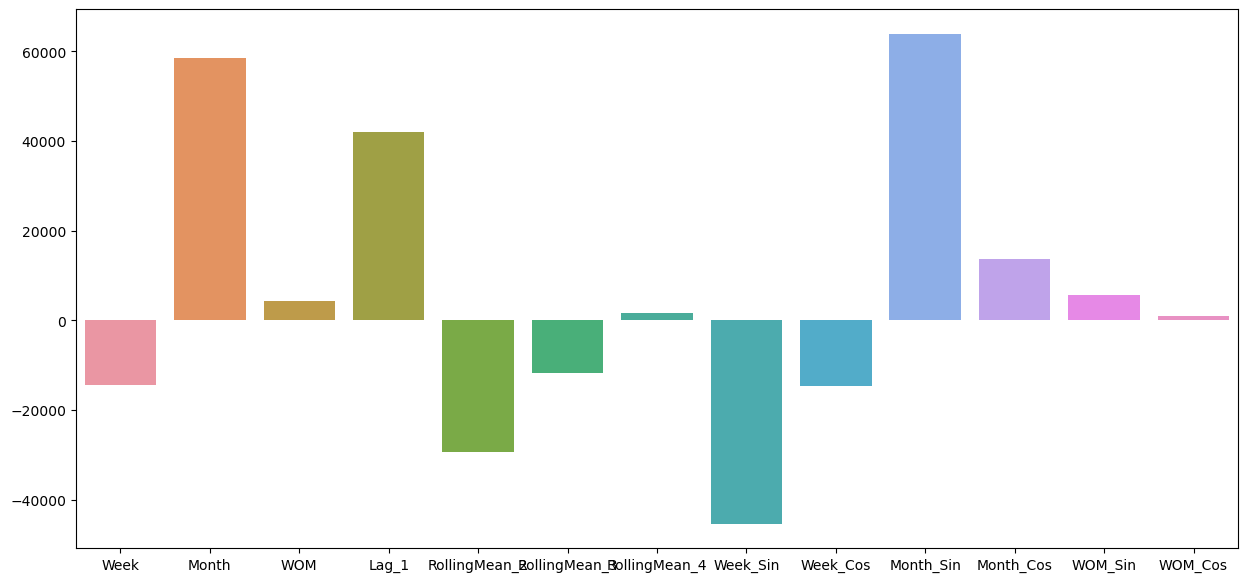

In [180]:
plt.figure(figsize=(15,7))
sns.barplot(x=uk_sales.drop(["Sales"], axis=1).columns, y=lr_fit.coef_)

In [181]:
train_sales.corr()[(np.abs(train_sales.corr()) >= 0.5) & (train_sales.corr() < 1)]

,Sales,Week,Month,WOM,Lag_1,RollingMean_2,RollingMean_3,RollingMean_4,Week_Sin,Week_Cos,Month_Sin,Month_Cos,WOM_Sin,WOM_Cos
Sales,NaN,NaN,0.595159,NaN,0.672590,0.549473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week,NaN,NaN,0.855955,NaN,0.525555,0.667503,0.748054,0.762425,-0.780658,NaN,-0.733341,NaN,NaN,NaN
Month,0.595159,0.855955,NaN,NaN,0.670135,0.720830,0.714559,0.670295,-0.771277,NaN,-0.798768,NaN,NaN,NaN
WOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.756052,NaN
Lag_1,0.672590,0.525555,0.670135,NaN,NaN,0.903168,0.776159,0.680454,NaN,NaN,NaN,NaN,NaN,NaN
RollingMean_2,0.549473,0.667503,0.720830,NaN,0.903168,NaN,0.937429,0.842638,NaN,NaN,NaN,NaN,NaN,NaN
RollingMean_3,NaN,0.748054,0.714559,NaN,0.776159,0.937429,NaN,0.955942,NaN,NaN,NaN,NaN,NaN,NaN
RollingMean_4,NaN,0.762425,0.670295,NaN,0.680454,0.842638,0.955942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week_Sin,NaN,-0.780658,-0.771277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929539,NaN,NaN,NaN
Week_Cos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925763,NaN,NaN


In [182]:
r2_score(y_test, y_pred)

0.03588617238363079

In [183]:
train_sales.drop(["WOM","WOM_Cos","RollingMean_4"],inplace=True,axis=1)
test_sales.drop(["WOM","WOM_Cos","RollingMean_4"],inplace=True,axis=1)

C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\2087401057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sales.drop(["WOM","WOM_Cos","RollingMean_4"],inplace=True,axis=1)
C:\Users\anant.jalota\AppData\Local\Temp\ipykernel_7188\2087401057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sales.drop(["WOM","WOM_Cos","RollingMean_4"],inplace=True,axis=1)


In [184]:
X_train_2 = train_sales.drop(["Sales"],axis=1)
X_test_2 = test_sales.drop(["Sales"],axis=1)

y_train_2 = train_sales["Sales"]
y_test_2 = test_sales["Sales"]

In [185]:
sc2 = StandardScaler()
X_train_sc1 = sc2.fit_transform(X_train_2,y_train_2)
X_test_sc1 = sc2.transform(X_test_2)

lr_fit1 = LinearRegression()
lr_fit1.fit(X_train_sc1,y_train_2)
y_pred_2 = lr_fit1.predict(X_test_sc1)

In [186]:
mean_squared_error(y_test_2, y_pred_2, squared=False)

54488.24961542854

In [188]:
lr_fit1.coef_

array([-15450.15342934,  56036.97402382,  42246.37288644, -29231.17716538,
        -8315.42882788, -48559.48772557, -16347.44989576,  65510.15675715,
        13963.51203177,   2573.56719318])

In [189]:
r2_score(y_test_2, y_pred_2)

0.014395731577806936

In [195]:
lr = Lasso(alpha=100,random_state=0)
lr.fit(X_train_sc, y_train)
y_pred_lr1 = lr.predict(X_test_sc)

In [196]:
mean_squared_error(y_test, y_pred_lr1, squared=False)

53810.31418451105

In [197]:
r2_score(y_test, y_pred_lr1)

0.03876867000295514

In [200]:
lr = Lasso(alpha=100,random_state=0)
lr.fit(X_train_sc1, y_train_2)
y_pred_lr1 = lr.predict(X_test_sc1)

mean_squared_error(y_test_2, y_pred_lr1, squared=False)

54370.027421395884

In [202]:
r2_score(y_test_2, y_pred_lr1)

0.018667988215286813

In [206]:
uk_sales_rf = uk_sales.copy(deep=True)
uk_sales_rf.drop(["WOM_Sin","WOM_Cos","Month_Sin","Month_Cos","Week_Sin","Week_Cos","Week"],axis=1,inplace=True)
uk_sales_rf["Month_Cyclical"] = np.abs(uk_sales_rf["Month"] - 6)
uk_sales_rf["WOM_Cyclical"] = np.abs(uk_sales_rf["WOM"] - 3)

train_rf = uk_sales_rf.loc[:"2011-09-25",]
test_rf = uk_sales_rf.loc["2011-10-02":,]

X_train_rf = train_rf.drop(["Sales"],axis=1)
X_test_rf = test_rf.drop(["Sales"],axis=1)

y_train_rf = train_rf["Sales"]
y_test_rf = test_rf["Sales"]

In [277]:
#Random Forest Regression
rf = RandomForestRegressor(n_estimators=100,max_depth=5,max_features=3,oob_score=True,random_state=0)
rf.fit(X_train_rf,y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

In [278]:
mean_squared_error(y_test_rf,y_pred_rf,squared=False)

48427.8000919242

In [279]:
r2_score(y_test_rf,y_pred_rf)

0.22145029586442844